# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html,"html.parser")


In [5]:
# Scrape the data table
table = soup.find("table", class_="table")  # Locate the table

In [6]:
headers = [header.text.strip() for header in table.find_all("th")]

In [7]:
# Extract all rows of data
rows = []
# Extract all rows of data from the table
for row in table.find_all("tr")[1:]:  # Skip the header row
    data = [col.text.strip() for col in row.find_all("td")]  # Extract text from each column
    rows.append(data)  # Append the row to the list
    # Print the stored rows to confirm extraction
#print(rows)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [ ]:
# Create an empty list
rows = []


# Loop through the scraped data to create a list of rows
for row in table.find_all("tr")[1:]:  # Skip the header row
    data = [col.text.strip() for col in row.find_all("td")]  # Extract text from each column
    print(data)  # Print each row's extracted data


In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
headers = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]
df = pd.DataFrame(rows, columns=headers)
print(df.head())


   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


In [ ]:
# Confirm DataFrame was created successfully




### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [ ]:
# Examine data type of each column
print(df.dtypes)  # Display current data types


 Examining data types before conversion:

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [12]:
# Change data types for data analysis
df["id"] = df["id"].astype(str)  # Keep id as object (string)
df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])  # Convert date to datetime format
df["sol"] = df["sol"].astype(int)  # Convert sol (Martian days) to integer
df["ls"] = df["ls"].astype(int)  # Convert solar longitude to integer
df["month"] = df["month"].astype(int)  # Convert Martian month to integer
df["min_temp"] = df["min_temp"].astype(float)  # Convert min_temp to float
df["pressure"] = df["pressure"].astype(float)  # Convert pressure to float

In [14]:
# Confirm type changes were successful by examining data types again
print(df.dtypes) 



id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [ ]:
# 1. How many months are there on Mars?
num_months = df["month"].nunique()
num_months


12

In [17]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = df["sol"].nunique()
num_sols


1867

In [18]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = df.groupby("month")["min_temp"].mean()
avg_min_temp_by_month


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

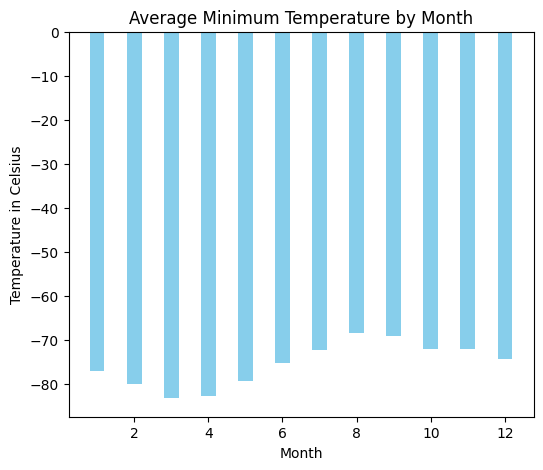

In [38]:
# Plot the average minimum temperature by month
plt.figure(figsize=(6, 5))  # Set figure size
plt.bar(avg_min_temp_by_month.index, avg_min_temp_by_month.values, color="skyblue", width=0.4)  # Create bar plot
# Formatting the chart to match the given image
plt.xlabel("Month")  # X-axis label
plt.ylabel("Temperature in Celsius")  # Y-axis label
plt.title("Average Minimum Temperature by Month")  # Chart title
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Show the plot
plt.show()


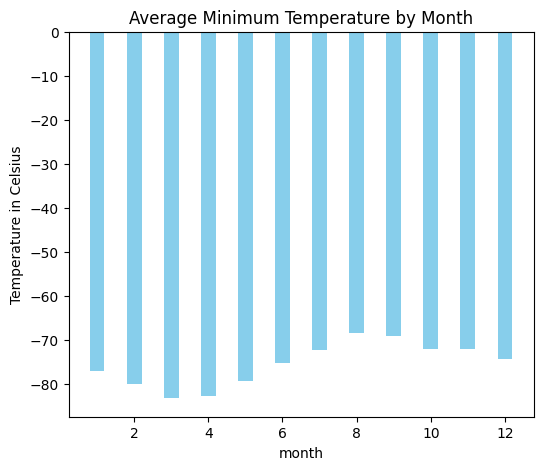

In [37]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
#  Sort the average minimum temperature by month (ascending order)
sorted_avg_min_temp = avg_min_temp_by_month.sort_values()

#  Plot the sorted average minimum temperature by month
plt.figure(figsize=(6, 5))  # Adjust figure size to match image
plt.bar(sorted_avg_min_temp.index, sorted_avg_min_temp.values, color="skyblue", width=0.4)  # Create sorted bar chart

# Formatting the chart to match the given image
plt.xlabel("month")  # X-axis label
plt.ylabel("Temperature in Celsius")  # Y-axis label
plt.title("Average Minimum Temperature by Month")  # Chart title
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Show the plot
plt.show()


In [41]:
# 4. What is the average pressure by month?
avg_pressure_by_month = df.groupby("month")["pressure"].mean()

# Print the results formatted to match your expected output
avg_pressure_by_month


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

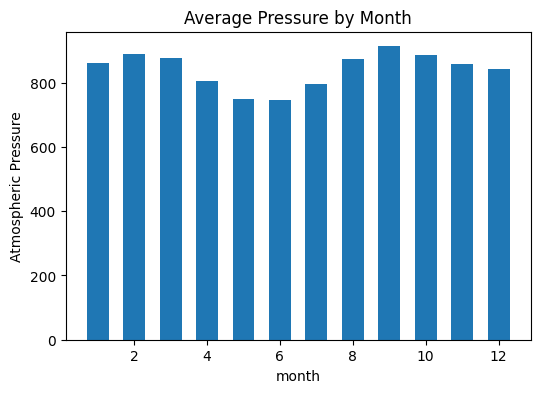

In [49]:
# Plot the average pressure by month
plt.figure(figsize=(6, 4))  # Adjust figure size
plt.bar(avg_pressure_by_month.index, avg_pressure_by_month.values, color="#1f77b4", width=0.6)  # Match color

# Formatting the chart to match the given image
plt.xlabel("month")  # X-axis label
plt.ylabel("Atmospheric Pressure")  # Y-axis label
plt.title("Average Pressure by Month")  # Chart title
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Show the plot
plt.show()


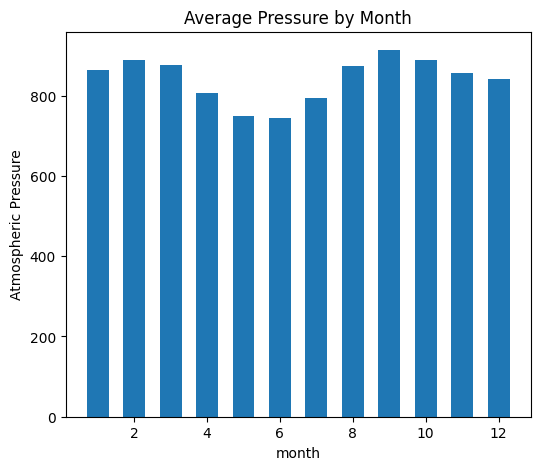

In [58]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure = avg_pressure_by_month.sort_values()

# Plot the sorted average pressure by month
plt.figure(figsize=(6, 5))  # Adjust figure size
plt.bar(sorted_avg_pressure.index, sorted_avg_pressure.values, color="#1f77b4", width=0.6)  

# Formatting the chart to match the given image
plt.xlabel("month")  # X-axis label
plt.ylabel("Atmospheric Pressure")  # Y-axis label
plt.title("Average Pressure by Month")  # Chart title
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Show the plot
plt.show()


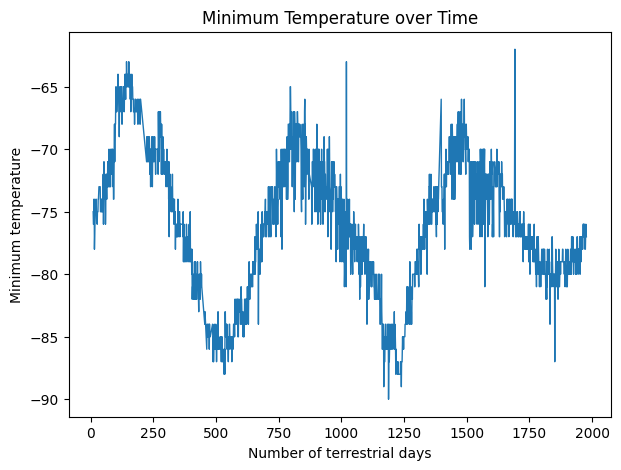

In [62]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(7, 5))  # Set figure size
plt.plot(df["sol"], df["min_temp"], linewidth=1)  # Line plot with thin lines

# Formatting the chart to match the given image
plt.xlabel("Number of terrestrial days")  # X-axis label
plt.ylabel("Minimum temperature")  # Y-axis label
plt.title("Minimum Temperature over Time")  # Chart title

# Show the plot
plt.show()

#### Minimum Temperature

YOUR ANALYSIS HERE

The temperature fluctuates between -90°C and -60°C over time.
There are clear dips and peaks at regular intervals.
This pattern suggests that Mars experiences seasonal variations similar to Earth, though with more extreme cold temperatures.
Conclusion:

The coldest months occur in the middle of the Martian year, while the warmest months appear before and after the dips in temperature.
The data confirms Mars has a seasonal climate, likely influenced by its elliptical orbit.


#### Atmospheric Pressure

YOUR ANALYSIS HERE

The average pressure bar chart indicates:

Atmospheric pressure varies across the 12 Martian months.
The highest atmospheric pressure is observed around Month 9 
The lowest atmospheric pressure is seen in Month 6 
Conclusion:

Mars experiences periodic pressure changes.

#### Year Length

YOUR ANALYSIS HERE

The minimum temperature over time helps estimate the length of a Martian year:

The temperature cycle repeats approximately every 675-700 Earth days.
A full cycle (cold-warm-cold) represents one Martian year.
Since we know from astronomy that a Martian year is about 687 Earth days, the plotted temperature pattern visually confirms this.
Conclusion:

Mars takes nearly twice as long as Earth to complete one orbit around the Sun.
The seasonal changes seen in the temperature cycles align with this 687-day period.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [63]:
# Write the data to a CSV
# Write the DataFrame to a CSV file
df.to_csv("mars_weather_data.csv", index=False)

print(" Data successfully saved to 'mars_weather_data.csv'.")


 Data successfully saved to 'mars_weather_data.csv'.


In [64]:
browser.quit()